# Overview

    -Test/Train Split
    -Min Max Scaling 

# Load Libraries & Data

In [1]:
import glob, os
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.model_selection import train_test_split
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

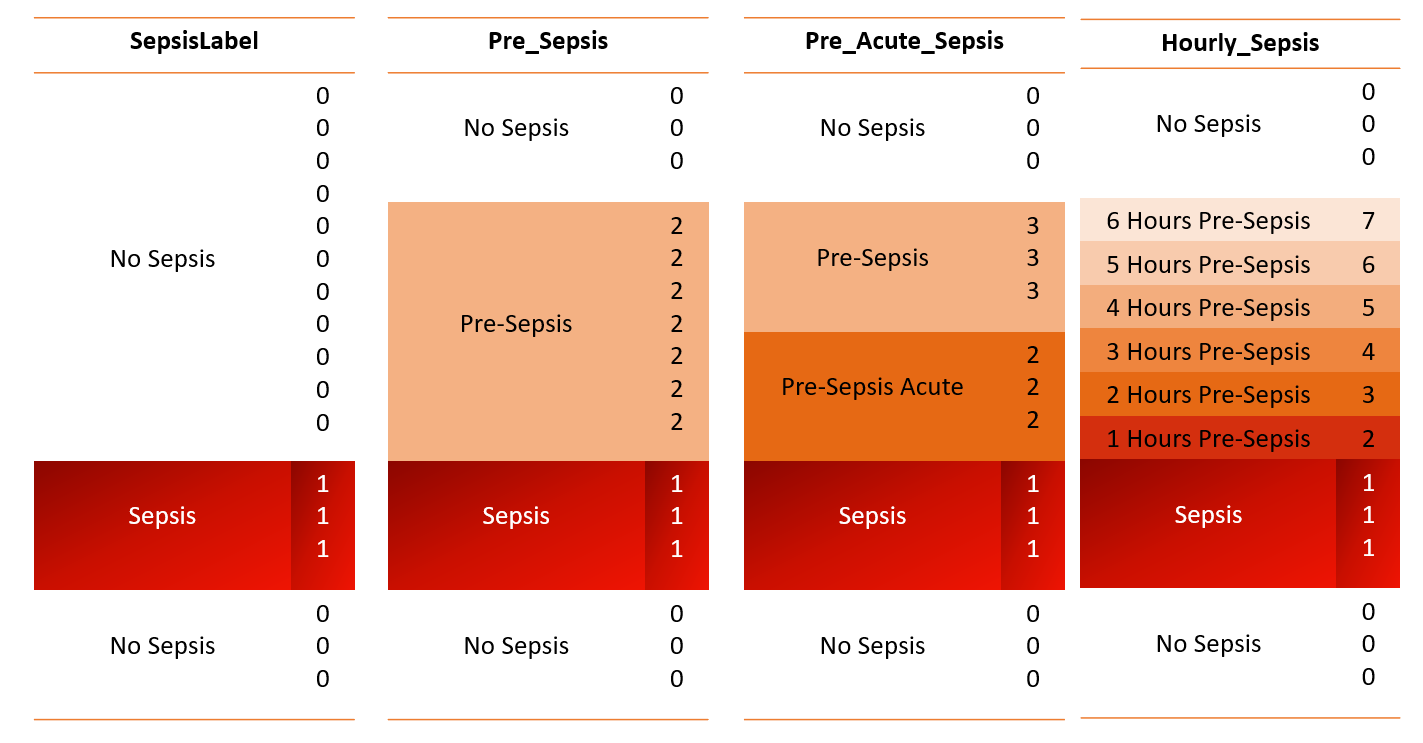

In [2]:
os.chdir("../data/interim")

#Load in Data
#First, the notes
with open("Data_Notes.json", "r") as infile:  
    notes=json.load(infile)
    
os.chdir("../processed")
#Next, the actual data
df=pd.read_csv('sepsis_data_preprocessed.csv',index_col=0)

os.chdir("../../docs")
Image(filename='SepsisClassifier.PNG') 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231307 entries, 0 to 231306
Data columns (total 97 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   d3_HR                 231307 non-null  float64
 1   d3_O2Sat              231307 non-null  float64
 2   d3_Temp               231307 non-null  float64
 3   d3_SBP                231307 non-null  float64
 4   d3_MAP                231307 non-null  float64
 5   d3_DBP                231307 non-null  float64
 6   d3_Resp               231307 non-null  float64
 7   d3_EtCO2              231307 non-null  float64
 8   d2_HR                 231307 non-null  float64
 9   d2_O2Sat              231307 non-null  float64
 10  d2_Temp               231307 non-null  float64
 11  d2_SBP                231307 non-null  float64
 12  d2_MAP                231307 non-null  float64
 13  d2_DBP                231307 non-null  float64
 14  d2_Resp               231307 non-null  float64
 15  

In [3]:
X=df.drop(columns=['SepsisLabel','SepsisOnset', 'Hourly_Sepsis', 'Pre_Sepsis', 'Pre_Acute_Sepsis'])
y_hr=df['Hourly_Sepsis']
y_pre_acute=df['Pre_Acute_Sepsis']
y_pre=df['Pre_Sepsis']
y_sepsis=df['SepsisLabel']
n=42

#Stratify argument???
X_train_hr, X_test_hr, y_train_hr, y_test_hr = train_test_split(X,y_hr,test_size=0.25,random_state=n)
X_train_pre_acute, X_test_pre_acute, y_train_pre_acute, y_test_pre_acute = train_test_split(X,y_pre_acute,test_size=0.25,random_state=n)
X_train_pre, X_test_pre, y_train_pre, y_test_pre = train_test_split(X,y_pre,test_size=0.25,random_state=n)
X_train_sepsis, X_test_sepsis, y_train_sepsis, y_test_sepsis = train_test_split(X,y_sepsis,test_size=0.25,random_state=n)


In [39]:
#Sklearn imports
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform
from datetime import datetime
from sklearn.metrics import classification_report

## Modeling Sepsis Label

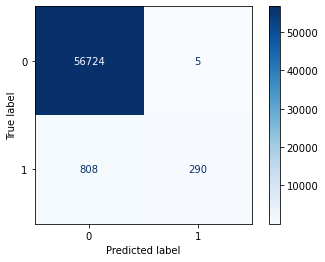

In [5]:
#Model Sepsis Label 
MM_scale=MinMaxScaler()
MM_scale.fit(X_train_sepsis)
X_train_sepsis=MM_scale.transform(X_train_sepsis)
X_test_sepsis=MM_scale.transform(X_test_sepsis)

RFC = RandomForestClassifier(random_state=42,max_depth=20)
RFC.fit(X_train_sepsis,y_train_sepsis)

plot_confusion_matrix(RFC,X_test_sepsis,y_test_sepsis,cmap=plt.cm.Blues)
plt.show()

In [6]:
#LogReg=LogisticRegression(max_iter=1000).fit(X_train_sepsis,y_train_sepsis)
#plot_confusion_matrix(LogReg,X_test_sepsis,y_test_sepsis,cmap=plt.cm.Blues)
#plt.show()

In [26]:
gb = GradientBoostingClassifier(random_state=42)
distributions=dict(learning_rate=uniform(0.01,1), 
                   max_features=np.arange(1,50), 
                   max_depth=np.arange(1,10))
clf=RandomizedSearchCV(gb,distributions,random_state=42,n_iter=2,cv=5)
search=clf.fit(X_train_sepsis, y_train_sepsis)
search.best_params_

{'learning_rate': 0.3845401188473625, 'max_depth': 8, 'max_features': 21}

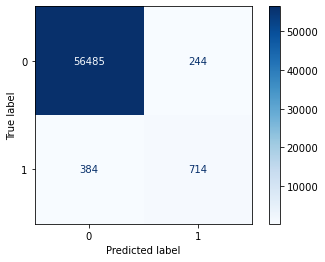

In [27]:
gb = GradientBoostingClassifier(learning_rate=0.3845401188473625,max_depth=8,max_features=21,random_state=42)
gb.fit(X_train_sepsis, y_train_sepsis)
plot_confusion_matrix(gb,X_test_sepsis,y_test_sepsis,cmap=plt.cm.Blues)
plt.show()

In [29]:
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)
gb = GradientBoostingClassifier(random_state=42)
distributions=dict(learning_rate=uniform(0.01,1), 
                   max_features=np.arange(1,50), 
                   max_depth=np.arange(1,10))
#njobs=-2
clf=RandomizedSearchCV(gb,distributions,random_state=42,n_iter=20,cv=5)
search=clf.fit(X_train_sepsis, y_train_sepsis)
search.best_params_
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

Current Time = 13:28:20
Current Time = 15:13:09


In [30]:
search.best_params_

{'learning_rate': 0.2510254660260117, 'max_depth': 7, 'max_features': 44}

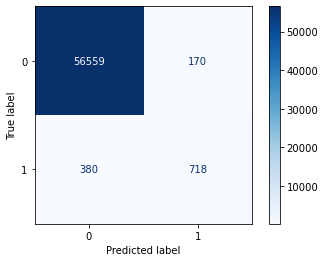

In [36]:
gb = GradientBoostingClassifier(learning_rate=0.2510254660260117,max_depth=7,max_features=44,random_state=42)
gb.fit(X_train_sepsis, y_train_sepsis)
plot_confusion_matrix(gb,X_test_sepsis,y_test_sepsis,cmap=plt.cm.Blues)
plt.show()

In [ ]:
#SVC_Model=SVC().fit(X_train_sepsis,y_train_sepsis)
#plot_confusion_matrix(LogReg,X_test_sepsis,y_test_sepsis,cmap=plt.cm.Blues)
#plt.show()

## Modeling Pre-Sepsis

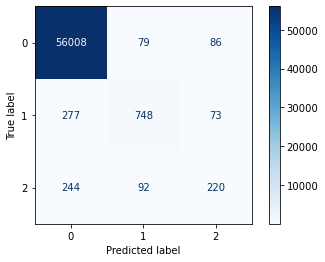

In [37]:
#Model Sepsis Label 
MM_scale=MinMaxScaler()
MM_scale.fit(X_train_pre)
X_train_pre=MM_scale.transform(X_train_pre)
X_test_pre=MM_scale.transform(X_test_pre)

gb_pre = GradientBoostingClassifier(learning_rate=0.2510254660260117,max_depth=7,max_features=44,random_state=42)
gb_pre.fit(X_train_pre, y_train_pre)
#Testing Data
plot_confusion_matrix(gb_pre,X_test_pre,y_test_pre,cmap=plt.cm.Blues)
plt.show()

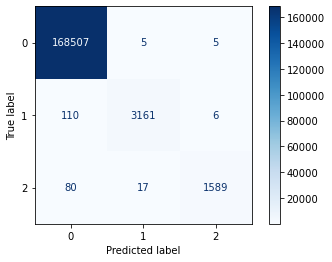

In [38]:
#Training Data
plot_confusion_matrix(gb_pre,X_train_pre,y_train_pre,cmap=plt.cm.Blues)
plt.show()

## Modeling Sepsis Hourly

In [ ]:
#Model Sepsis Hourly
#MM_scale=MinMaxScaler()
#MM_scale.fit(X_train_hr)
#X_train_hr=MM_scale.transform(X_train_hr)
#X_test_hr=MM_scale.transform(X_test_hr)

#RFC = RandomForestClassifier(random_state=42,max_depth=20)
#RFC.fit(X_train_hr,y_train_hr)

#plot_confusion_matrix(RFC,X_test_hr,y_test_hr,cmap=plt.cm.Blues)
#plt.show()